In [1]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


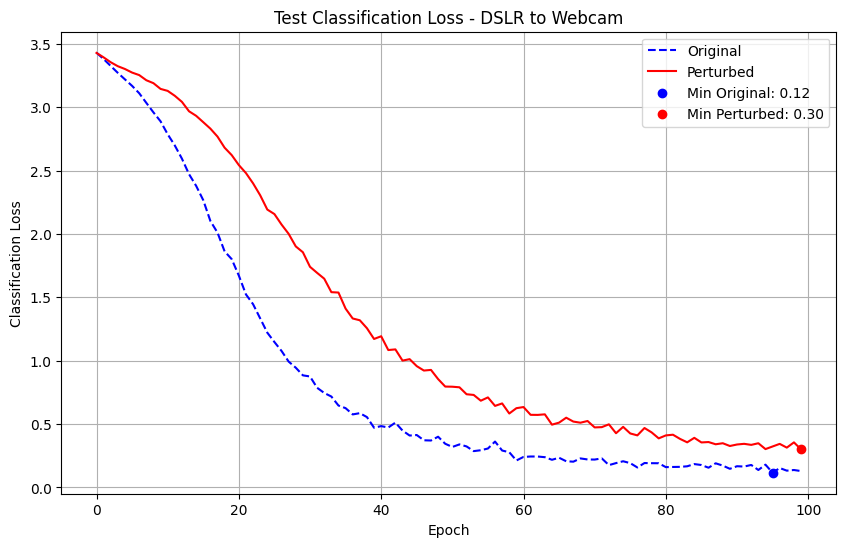

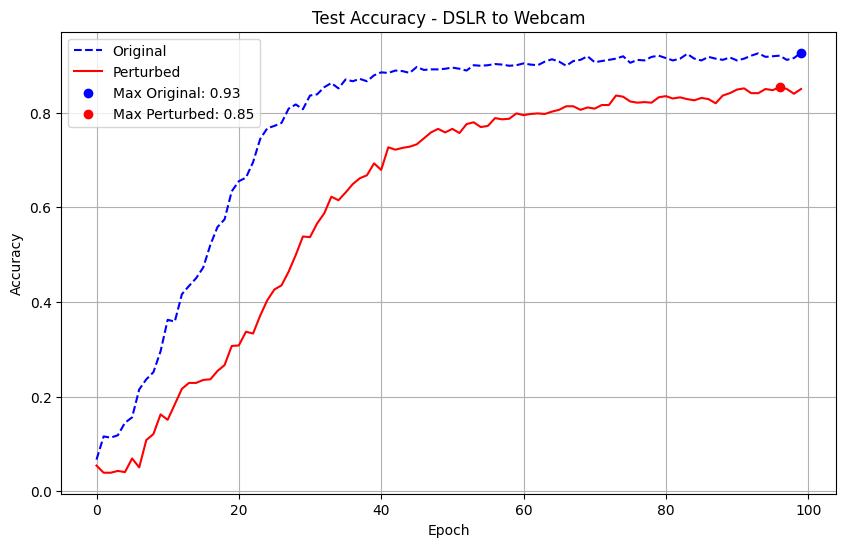

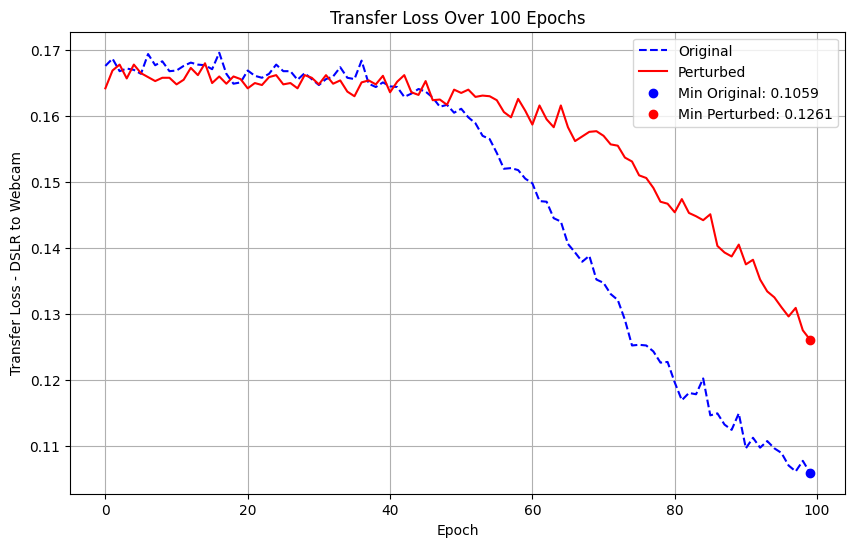

In [2]:
import re
import matplotlib.pyplot as plt

def parse_logs(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    cls_loss = []
    acc = []
    transfer_loss = []
    for line in lines:
        if "cls_loss" in line and "acc" in line and "transfer_loss" in line:
            cls_loss_match = re.search(r"cls_loss: ([\d\.]+)", line)
            acc_match = re.search(r"acc: ([\d\.]+)", line)
            transfer_loss_match = re.search(r"transfer_loss: ([\d\.]+)", line)
            if cls_loss_match and acc_match and transfer_loss_match:
                cls_loss.append(float(cls_loss_match.group(1)))
                acc.append(float(acc_match.group(1)))
                transfer_loss.append(float(transfer_loss_match.group(1)))
    return cls_loss, acc, transfer_loss


original_file = "results/dw.txt"
perturbed_file = "results/dwp.txt"

original_cls_loss, original_acc, original_transfer_loss = parse_logs(original_file)
perturbed_cls_loss, perturbed_acc, perturbed_transfer_loss = parse_logs(perturbed_file)

plt.figure(figsize=(10, 6))
plt.plot(original_cls_loss, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_cls_loss, label="Perturbed", color='red', linestyle='-')
min_original_loss_epoch = original_cls_loss.index(min(original_cls_loss))
min_perturbed_loss_epoch = perturbed_cls_loss.index(min(perturbed_cls_loss))
plt.scatter(min_original_loss_epoch, min(original_cls_loss), color='blue', label=f"Min Original: {min(original_cls_loss):.2f}", zorder=5)
plt.scatter(min_perturbed_loss_epoch, min(perturbed_cls_loss), color='red', label=f"Min Perturbed: {min(perturbed_cls_loss):.2f}", zorder=5)
plt.title("Test Classification Loss - DSLR to Webcam")
plt.xlabel("Epoch")
plt.ylabel("Classification Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(original_acc, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_acc, label="Perturbed", color='red', linestyle='-')
max_original_acc_epoch = original_acc.index(max(original_acc))
max_perturbed_acc_epoch = perturbed_acc.index(max(perturbed_acc))
plt.scatter(max_original_acc_epoch, max(original_acc), color='blue', label=f"Max Original: {max(original_acc):.2f}", zorder=5)
plt.scatter(max_perturbed_acc_epoch, max(perturbed_acc), color='red', label=f"Max Perturbed: {max(perturbed_acc):.2f}", zorder=5)
plt.title("Test Accuracy - DSLR to Webcam")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(original_transfer_loss, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_transfer_loss, label="Perturbed", color='red', linestyle='-')
min_original_transfer_epoch = original_transfer_loss.index(min(original_transfer_loss))
min_perturbed_transfer_epoch = perturbed_transfer_loss.index(min(perturbed_transfer_loss))
plt.scatter(min_original_transfer_epoch, min(original_transfer_loss), color='blue', label=f"Min Original: {min(original_transfer_loss):.4f}", zorder=5)
plt.scatter(min_perturbed_transfer_epoch, min(perturbed_transfer_loss), color='red', label=f"Min Perturbed: {min(perturbed_transfer_loss):.4f}", zorder=5)

plt.title("Transfer Loss Over 100 Epochs")
plt.xlabel("Epoch")
plt.ylabel("Transfer Loss - DSLR to Webcam")
plt.legend()
plt.grid(True)
plt.show()
